<img src="https://i.imgur.com/6U6q5jQ.png"/>

<a target="_blank" href="https://colab.research.google.com/github/SocialAnalytics-StrategicIntelligence/GeoDFBasics_py/blob/main/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# The Geo Dataframe

The geodataframe (GDF) is a dataframe (DF) where every row represents an spatial element (point, line, polygon).

Historically, the most common file type that stores spatial elements is the shapefile. Let's take a look at some of them:

1. In GitHub (cloud), create a repository named: introgeodf.
2. Clone that repo to a local folder in your computer.
3. In that local folder in your computer, create a folder named **maps**.
4. Go to paidea and download three compressed files.
5. Download those files into the folder **maps** in your computer: *countries*, *cities*, and *rivers*.

You may see something like this:

<img src="https://github.com/CienciaDeDatosEspacial/code_and_data/blob/main/mapsFolderImage.png?raw=true">

You can decompress those files:

<img title="a title" alt="Alt text" src="https://github.com/CienciaDeDatosEspacial/code_and_data/blob/main/folderRar_1.png?raw=true">

Now, take a look a **World_Countries**:

<img src="https://github.com/CienciaDeDatosEspacial/code_and_data/blob/main/imageCountries_shp.png?raw=true">

There, you see that this **one map** requires **several files**. That is the nature of the shapefile.

Let's read the file with the help of **geopandas**:

In [5]:
pip install geopandas


In [7]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

Let's use some familiar DF functions:

In [8]:
# what is it?
type(countries)

geopandas.geodataframe.GeoDataFrame

In [9]:
# dimensions
countries.shape

(252, 2)

In [10]:
# names
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [11]:
# some content
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [20]:
# any missing values?
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [13]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


As you see, every pandas command is working, but now we have a new column type: **geometry**. Let's see this map of countries:

<Axes: >

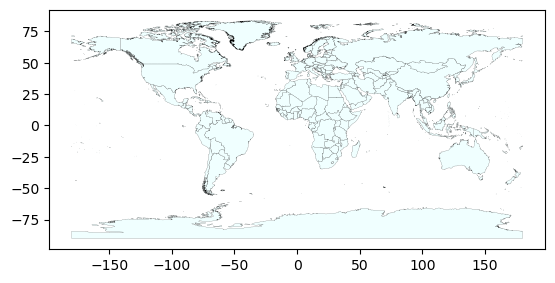

In [14]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1) #thickness of lines

Let's open the other maps:

In [18]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

This is the rivers map:

<Axes: >

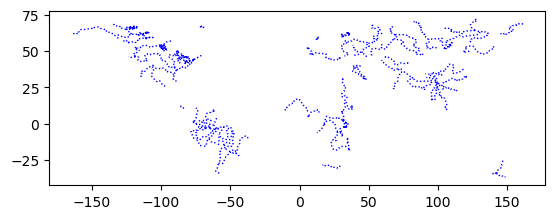

In [19]:
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

This is the cities map:

<Axes: >

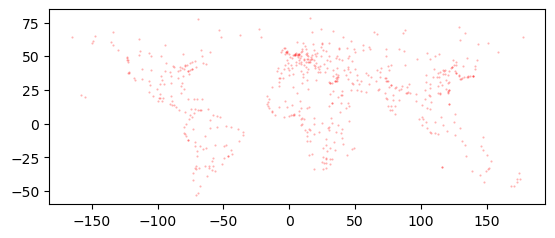

In [21]:
cities.plot(marker='.', # marker type
            color='red',
            markersize=1,
            alpha=0.3) # transparency

You can plot all the layers, as long as they share the same projection.
Let's verify that all have the same projection (**CRS**):

In [22]:
countries.crs==cities.crs==cities.crs

True

You can start by creating the layer on the back (the base), and add layers on top:

> Agregar bloque entrecomillado



<Axes: >

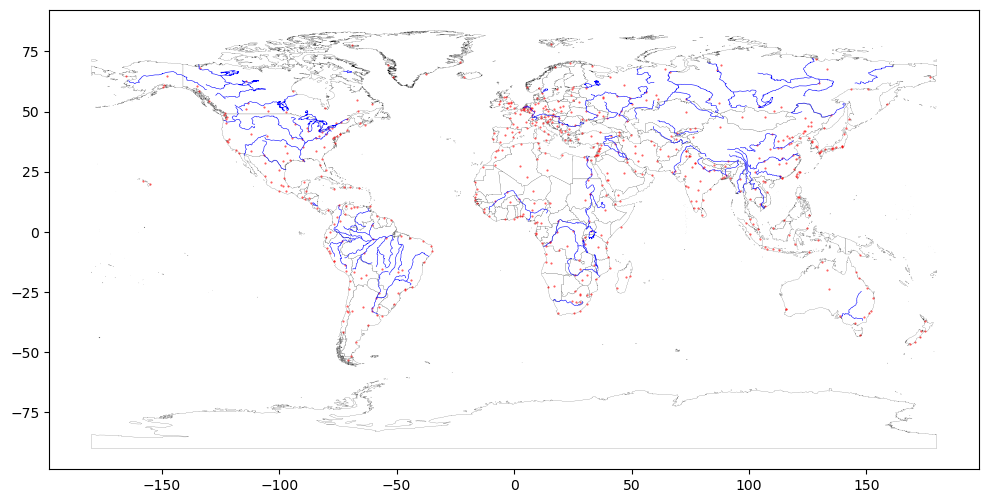

In [23]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...


In [24]:
countries.to_file(os.path.join("maps","worldMap.gpkg"),layer='countryBorders', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMap.gpkg"),layer='riverLines', driver="GPKG")
cities.to_file(os.path.join("maps","worldMap.gpkg"),layer='cityPoints', driver="GPKG")

**texto en negrita**### Exercise 1
<div class="alert-success">

1. Commit and push the recently created geopackage.
    
2. Get the link from Github to read the geopackage into R.
    
3. Using the sf library in R, confirm the layers created (use st_layers), and open each map (read_sf). Draw the three layers (as we did in Python) using ggplot.
    
</div>

## Subsetting

You can subset your map by *filtering*:

In [25]:
brazil=countries[countries.COUNTRY=='Brazil']

But you can also subset by *clipping*, as sometimes other data frames may not have the same fields for filtering:

In [26]:
citiesBrazil_clipped = gpd.clip(gdf=cities,
                          mask=brazil)
riversBrazil_clipped = gpd.clip(gdf=rivers,
                               mask=brazil)

Then, you can plot the clipped version:

<Axes: >

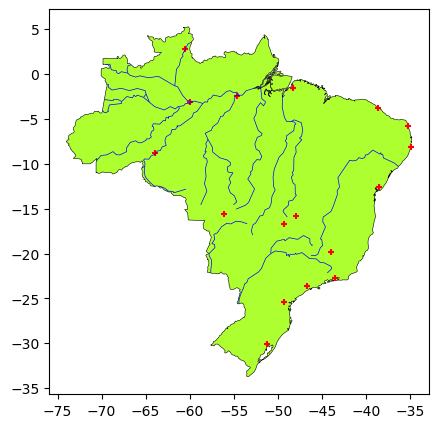

In [27]:
base = brazil.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesBrazil_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
riversBrazil_clipped.plot(edgecolor='blue', linewidth=0.5,
                    ax=base)

You can also check what geometries you have in your GDF:

In [28]:
brazil.geom_type

29    MultiPolygon
dtype: object

In [19]:
citiesBrazil_clipped.geom_type

285    Point
279    Point
276    Point
271    Point
268    Point
340    Point
275    Point
274    Point
568    Point
266    Point
447    Point
261    Point
338    Point
380    Point
381    Point
318    Point
421    Point
dtype: object

In [29]:
riversBrazil_clipped.geom_type

56         LineString
55         LineString
97         LineString
67         LineString
70         LineString
38         LineString
24    MultiLineString
5          LineString
64         LineString
68         LineString
83    MultiLineString
92    MultiLineString
59         LineString
37         LineString
80         LineString
1     MultiLineString
60         LineString
29    MultiLineString
66    MultiLineString
62         LineString
54         LineString
dtype: object

Notice that the amount of elements (rows) is different, and that all those elements do not belong to the exact geometry type.

### Exercise 2
<div class="alert-success">

1. Follow the same steps in this last section, but use Peru.
2. Plot your three layers in R.
    
</div>

In [31]:
Peru=countries[countries.COUNTRY=='Peru']


In [32]:
citiesPeru_clipped = gpd.clip(gdf=cities,
                          mask=Peru)
riversPeru_clipped = gpd.clip(gdf=rivers,
                               mask=Peru)

<Axes: >

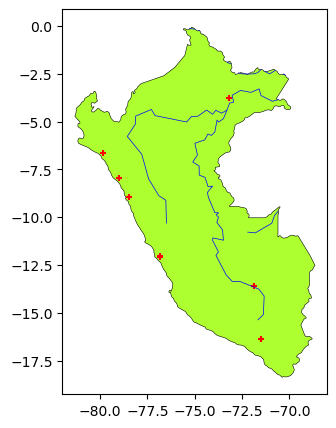

In [33]:
base = Peru.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesPeru_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
riversPeru_clipped.plot(edgecolor='blue', linewidth=0.5,
                    ax=base)

In [34]:
Peru.geom_type


172    Polygon
dtype: object

In [35]:
citiesPeru_clipped.geom_type


269    Point
339    Point
529    Point
317    Point
423    Point
260    Point
476    Point
422    Point
dtype: object

In [36]:
riversPeru_clipped.geom_type


59         LineString
1     MultiLineString
60    MultiLineString
85         LineString
65         LineString
dtype: object

In [38]:
import geopandas as gpd
import os

# Define la ruta donde se guardará el archivo GeoPackage
ruta_archivo_gpkg = os.path.join("maps", "Peru_data2.gpkg")

# Crea el archivo GeoPackage con las capas de datos de Brasil
gpd.GeoDataFrame(Peru).to_file(ruta_archivo_gpkg, layer='Peru', driver="GPKG")
gpd.GeoDataFrame(citiesPeru_clipped).to_file(ruta_archivo_gpkg, layer='cityPoints', driver="GPKG")
gpd.GeoDataFrame(riversPeru_clipped).to_file(ruta_archivo_gpkg, layer='riverLines', driver="GPKG")


<a class="anchor" id="1"></a>

## Map Projection

The CRS is a very important property of the maps. They affect three aspects:

* shape
* area
* scale
* direction

Most maps come with a default CRS: 4326. Pay attention:

In [39]:
# check units
brazil.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

Polygons have a centroid. When we try getting a centroid from an **unprojected** polygon, you get:

In [41]:
# centroid
brazil.centroid

C:\Users\USER\AppData\Local\Temp\ipykernel_12728\515368123.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  brazil.centroid


29    POINT (-53.09009 -10.77302)
dtype: geometry

### Reprojecting

A projected CRS will have units in meters or feet (or similar). You can request a crs per country [here](https://epsg.io/?q=brazil+kind%3APROJCRS):

In [42]:
# recommended for Brazil (meters)
brazil.to_crs(5641).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [43]:
# now this works
brazil.to_crs(5641).centroid

29    POINT (3884486.179 8756856.093)
dtype: geometry

<Axes: >

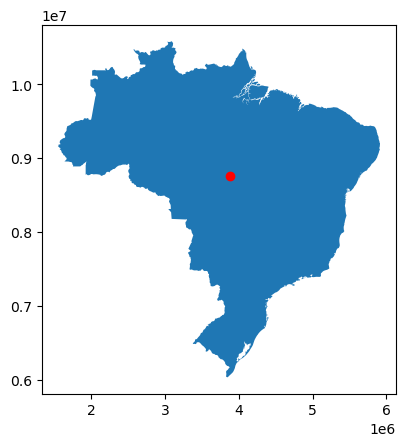

In [44]:
# replotting:

base5641=brazil.to_crs(5641).plot()
brazil.to_crs(5641).centroid.plot(color='red',ax=base5641)

Let's keep the projected version for all our maps:

In [45]:
brazil_5641=brazil.to_crs(5641)

cities_brazil_5641=citiesBrazil_clipped.to_crs(brazil_5641.crs)

rivers_brazil_5641=riversBrazil_clipped.to_crs(brazil_5641.crs)



In [46]:
# saving
import os

brazil_5641.to_file(os.path.join("maps","brazilMaps_5641B.gpkg"), layer='country', driver="GPKG")
cities_brazil_5641.to_file(os.path.join("maps","brazilMaps_5641B.gpkg"), layer='cities', driver="GPKG")
rivers_brazil_5641.to_file(os.path.join("maps","brazilMaps_5641B.gpkg"), layer='rivers', driver="GPKG")

In [47]:
brazil_5641.centroid

29    POINT (3884486.179 8756856.093)
dtype: geometry

In [48]:
brazil_5641.centroid.to_file(os.path.join("maps","brazilMaps_5641B.gpkg"), layer='centroid', driver="GPKG")

<a class="anchor" id="3"></a>

## Creating Spatial data

You will get Lines and Polygons as maps for sure, but that may not be the case with points. Let me download a **CSV** file with information on the airports in Brazil from this [website](https://data.humdata.org/dataset/ourairports-bra), I will save it in my **data** folder:

In [51]:
import pandas as pd
infoairports=pd.read_csv(os.path.join("data","br-airports.csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +name,#country +code +iso2,...,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,5910,SBGR,large_airport,Guarulhos - Governador André Franco Montoro In...,-23.431944,-46.467778,2461,SA,Brazil,BR,...,São Paulo,1,SBGR,GRU,SP0002,http://www.aeroportoguarulhos.net/,https://en.wikipedia.org/wiki/S%C3%A3o_Paulo-G...,Cumbica,1016675,2021-10-28T15:52:55+00:00
2,5906,SBGL,large_airport,Rio Galeão – Tom Jobim International Airport,-22.809999,-43.250557,28,SA,Brazil,BR,...,Rio De Janeiro,1,SBGL,GIG,RJ0001,NaN,https://en.wikipedia.org/wiki/Rio_de_Janeiro-G...,Galeão - Antônio Carlos Jobim International Ai...,51475,2021-10-14T18:09:35+00:00
3,5974,SBSP,medium_airport,Congonhas Airport,-23.627657,-46.654601,2631,SA,Brazil,BR,...,São Paulo,1,SBSP,CGH,SP0001,http://www.infraero.gov.br/usa/aero_prev_home....,https://en.wikipedia.org/wiki/Congonhas-S%C3%A...,http://www.infraero.gov.br/usa/aero_prev_home....,750,2022-05-03T20:10:35+00:00
6668,309669,SSVR,closed,Volta Redonda Airport,-22.4978,-44.085,1245,SA,Brazil,BR,...,Volta Redonda,0,NaN,NaN,NaN,NaN,NaN,"SSVR, SSVR, QVR",0,2013-09-28T14:52:12+00:00
6669,505308,BR-1760,heliport,Unimed Volta Redonda Helipad,-22.533988,-44.076918,1385,SA,Brazil,BR,...,Volta Redonda,0,SSKV,NaN,RJ0147,NaN,NaN,NaN,0,2022-12-06T21:28:25+00:00
6670,341727,BR-1429,heliport,Santa Helena Heliport,-23.59851,-47.441196,2254,SA,Brazil,BR,...,Votorantim,0,SWHE,NaN,SP0807,NaN,NaN,NaN,0,2021-03-07T10:30:07+00:00
6671,343017,BR-1493,heliport,Bandeiras Centro Empresarial Heliport,-23.536615,-47.449475,1827,SA,Brazil,BR,...,Votorantim,0,SWST,NaN,SP1306,NaN,NaN,NaN,0,2021-04-14T20:12:01+00:00


This needs some cleaning:

In [52]:
# bye first row
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,5910,SBGR,large_airport,Guarulhos - Governador André Franco Montoro In...,-23.431944,-46.467778,2461,SA,Brazil,BR,...,São Paulo,1,SBGR,GRU,SP0002,http://www.aeroportoguarulhos.net/,https://en.wikipedia.org/wiki/S%C3%A3o_Paulo-G...,Cumbica,1016675,2021-10-28T15:52:55+00:00
1,5906,SBGL,large_airport,Rio Galeão – Tom Jobim International Airport,-22.809999,-43.250557,28,SA,Brazil,BR,...,Rio De Janeiro,1,SBGL,GIG,RJ0001,NaN,https://en.wikipedia.org/wiki/Rio_de_Janeiro-G...,Galeão - Antônio Carlos Jobim International Ai...,51475,2021-10-14T18:09:35+00:00
2,5974,SBSP,medium_airport,Congonhas Airport,-23.627657,-46.654601,2631,SA,Brazil,BR,...,São Paulo,1,SBSP,CGH,SP0001,http://www.infraero.gov.br/usa/aero_prev_home....,https://en.wikipedia.org/wiki/Congonhas-S%C3%A...,http://www.infraero.gov.br/usa/aero_prev_home....,750,2022-05-03T20:10:35+00:00
3,5967,SBRJ,medium_airport,Santos Dumont Airport,-22.9105,-43.163101,11,SA,Brazil,BR,...,Rio de Janeiro,1,SBRJ,SDU,RJ0002,https://www4.infraero.gov.br/aeroportos/aeropo...,https://en.wikipedia.org/wiki/Santos_Dumont_Ai...,RIO,750,2022-03-28T23:27:00+00:00
4,5872,SBBR,large_airport,Presidente Juscelino Kubitschek International ...,-15.869167,-47.920834,3497,SA,Brazil,BR,...,Brasília,1,SBBR,BSB,DF0001,http://www.infraero.gov.br/usa/aero_prev_home....,https://en.wikipedia.org/wiki/Bras%C3%ADlia_In...,NaN,51275,2020-08-24T11:15:12+00:00


In [53]:
# keep the  columns needed

infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [54]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

In [55]:
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6671 entries, 0 to 6670
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           6671 non-null   object
 1   type           6671 non-null   object
 2   latitude_deg   6671 non-null   object
 3   longitude_deg  6671 non-null   object
 4   elevation_ft   6500 non-null   object
 5   region_name    6671 non-null   object
 6   municipality   6647 non-null   object
dtypes: object(7)
memory usage: 364.9+ KB


Some formatting:

In [56]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6671 entries, 0 to 6670
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6671 non-null   object 
 1   type           6671 non-null   object 
 2   latitude_deg   6671 non-null   float64
 3   longitude_deg  6671 non-null   float64
 4   elevation_ft   6500 non-null   float64
 5   region_name    6671 non-null   object 
 6   municipality   6647 non-null   object 
dtypes: float64(3), object(4)
memory usage: 364.9+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

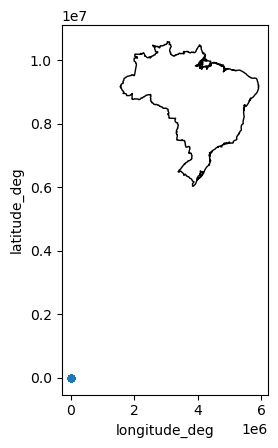

In [57]:
# let's plot

base = brazil_5641.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

Why is it wrong?

In [58]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=brazil.crs.to_epsg())# the coordinates were in degrees - unprojected

<Axes: >

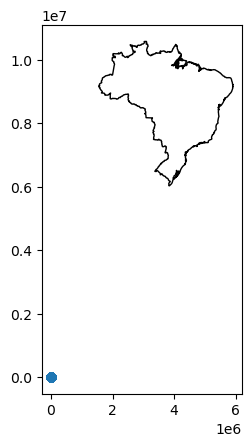

In [59]:
# does it look better?

# let's plot

base = brazil_5641.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [60]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

Let's keep the projected version:

<Axes: >

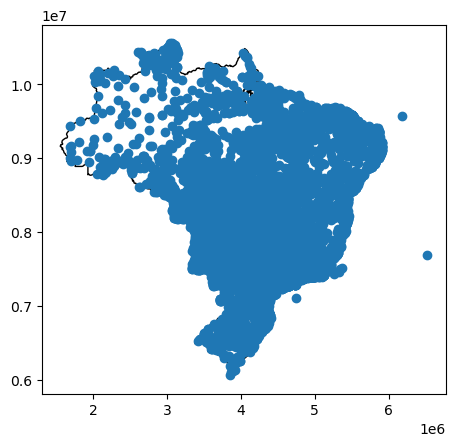

In [61]:
airports_5641=airports.to_crs(5641)

## then

base = brazil_5641.plot(color='white', edgecolor='black')
airports_5641.plot(ax=base)

Remember you have type of airports:

In [62]:
airports_5641['type'].value_counts() # this will not work: airports.type.value_counts()

type
small_airport     4587
heliport          1699
closed             251
medium_airport     124
large_airport        8
seaplane_base        2
Name: count, dtype: int64

We may use that in the future. For now, just rename the **type** column to a different one.

In [63]:
airports_5641.rename(columns={'type':'kind'},inplace=True)

In [64]:
# adding the airports
airports_5641.to_file(os.path.join("maps","brazilMaps_5641.gpkg"), layer='airports', driver="GPKG")

### Exercise 3
<div class="alert-success">

1. Reproject your maps of Peru.
2. Find the airports for Peru [here](https://ourairports.com/data/). The data is in a CSV file.
3. Create projected layer of airports.
4. Plot all the layers in R.
    
</div>

In [65]:
# check units
Peru.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [66]:
# centroid 8901
Peru.centroid

C:\Users\USER\AppData\Local\Temp\ipykernel_12728\3080989685.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Peru.centroid


172    POINT (-74.37549 -9.16382)
dtype: geometry

In [67]:
# recommended for Brazil (meters)
Peru.to_crs(8901).crs.axis_info

[Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Ellipsoidal height, abbrev=h, direction=up, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [68]:
# now this works
Peru.to_crs(8901).centroid

C:\Users\USER\AppData\Local\Temp\ipykernel_12728\336773051.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Peru.to_crs(8901).centroid


172    POINT (-74.37549 -9.16382)
dtype: geometry

C:\Users\USER\AppData\Local\Temp\ipykernel_12728\1802128156.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Peru.to_crs(8901).centroid.plot(color='red',ax=base8901)


<Axes: >

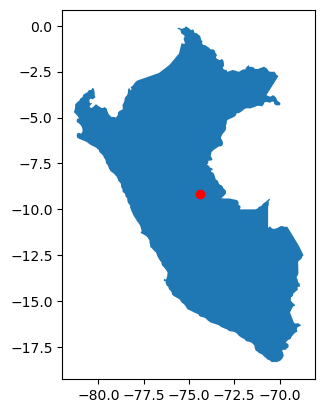

In [69]:
# replotting:

base8901=Peru.to_crs(8901).plot()
Peru.to_crs(8901).centroid.plot(color='red',ax=base8901)

In [70]:
Peru_8901=Peru.to_crs(8901)

cities_Peru_8901=citiesPeru_clipped.to_crs(Peru_8901.crs)

rivers_Peru_8901=riversPeru_clipped.to_crs(Peru_8901.crs)

In [71]:
# saving 
import os

Peru_8901.to_file(os.path.join("maps","PeruMaps_8901B.gpkg"), layer='country', driver="GPKG")
cities_Peru_8901.to_file(os.path.join("maps","PeruMaps_8901B.gpkg"), layer='cities', driver="GPKG")
rivers_Peru_8901.to_file(os.path.join("maps","PeruMaps_8901B.gpkg"), layer='rivers', driver="GPKG")

In [73]:
Peru_8901.centroid


C:\Users\USER\AppData\Local\Temp\ipykernel_12728\184364645.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Peru_8901.centroid


172    POINT (-74.37549 -9.16382)
dtype: geometry

In [75]:
Peru_8901.centroid.to_file(os.path.join("maps","PeruMaps_8901B.gpkg"), layer='centroid', driver="GPKG")



C:\Users\USER\AppData\Local\Temp\ipykernel_12728\3889825405.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Peru_8901.centroid.to_file(os.path.join("maps","PeruMaps_8901B.gpkg"), layer='centroid', driver="GPKG")


AEROPUERTOS DEL PERU

In [76]:
import pandas as pd 
infoairports=pd.read_csv(os.path.join("data","pe-airports.csv"))

# some rows

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,6217,SPIM,large_airport,Jorge Chávez International Airport,-12.021900,-77.114305,113.0,SA,Peru,PE,...,Lima,1,SPJC,LIM,NaN,http://www.lap.com.pe/,https://en.wikipedia.org/wiki/Jorge_Ch%C3%A1ve...,"SPIM, SPJC",1050,2021-05-03T09:18:25+00:00
1,6243,SPZO,large_airport,Alejandro Velasco Astete International Airport,-13.535700,-71.938797,10860.0,SA,Peru,PE,...,Cusco,1,SPZO,CUZ,NaN,http://www.corpac.gob.pe/,https://en.wikipedia.org/wiki/Alejandro_Velasc...,NaN,1000,2010-09-07T09:49:15+00:00
2,6233,SPQU,medium_airport,Rodríguez Ballón International Airport,-16.341101,-71.583099,8405.0,SA,Peru,PE,...,Arequipa,1,SPQU,AQP,NaN,NaN,https://en.wikipedia.org/wiki/Rodriguez_Ballon...,NaN,750,2010-09-07T09:47:49+00:00
3,6222,SPJL,medium_airport,Inca Manco Capac International Airport,-15.467100,-70.158203,12552.0,SA,Peru,PE,...,Juliaca,1,SPJL,JUL,NaN,NaN,https://en.wikipedia.org/wiki/Inca_Manco_Capac...,NaN,750,2008-07-21T16:57:31+00:00
200,351487,PE-0013,heliport,Pucallpa Air Force Heliport,-8.351500,-74.581900,505.0,SA,Peru,PE,...,Pucallpa,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:32:29+00:00
201,351489,PE-0015,heliport,Puerto Anapati Heliport,-11.928590,-73.987700,1496.0,SA,Peru,PE,...,Puerto Anapati,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:37:03+00:00
202,351491,PE-0017,heliport,Puerto Ocopa Heliport,-11.147930,-74.306290,1056.0,SA,Peru,PE,...,Puerto Ocopa,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:40:40+00:00
203,351492,PE-0018,heliport,Tanquin Heliport,-12.126320,-74.075990,1880.0,SA,Peru,PE,...,Tanquin,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-01-15T01:42:05+00:00


In [77]:
# bye first row 
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,6243,SPZO,large_airport,Alejandro Velasco Astete International Airport,-13.535700,-71.938797,10860.0,SA,Peru,PE,...,Cusco,1,SPZO,CUZ,NaN,http://www.corpac.gob.pe/,https://en.wikipedia.org/wiki/Alejandro_Velasc...,NaN,1000,2010-09-07T09:49:15+00:00
1,6233,SPQU,medium_airport,Rodríguez Ballón International Airport,-16.341101,-71.583099,8405.0,SA,Peru,PE,...,Arequipa,1,SPQU,AQP,NaN,NaN,https://en.wikipedia.org/wiki/Rodriguez_Ballon...,NaN,750,2010-09-07T09:47:49+00:00
2,6222,SPJL,medium_airport,Inca Manco Capac International Airport,-15.467100,-70.158203,12552.0,SA,Peru,PE,...,Juliaca,1,SPJL,JUL,NaN,NaN,https://en.wikipedia.org/wiki/Inca_Manco_Capac...,NaN,750,2008-07-21T16:57:31+00:00
3,6242,SPZA,medium_airport,Maria Reiche Neuman Airport,-14.854000,-74.961502,1860.0,SA,Peru,PE,...,Nazca,1,SPZA,NZC,NaN,https://www.aeronasca.com/como-llegar-al-aerop...,https://en.wikipedia.org/wiki/Maria_Reiche_Neu...,NaN,750,2022-04-07T13:53:44+00:00
4,6232,SPQT,medium_airport,Coronel FAP Francisco Secada Vignetta Internat...,-3.784740,-73.308800,306.0,SA,Peru,PE,...,Iquitos,1,SPQT,IQT,NaN,NaN,https://en.wikipedia.org/wiki/Crnl._FAP_Franci...,NaN,750,2022-08-29T12:46:38+00:00


In [78]:
# keep the  columns needed

infoairports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'country_name', 'iso_country',
       'region_name', 'iso_region', 'local_region', 'municipality',
       'scheduled_service', 'gps_code', 'iata_code', 'local_code', 'home_link',
       'wikipedia_link', 'keywords', 'score', 'last_updated'],
      dtype='object')

In [79]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

In [80]:
infoairports.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           203 non-null    object 
 1   type           203 non-null    object 
 2   latitude_deg   203 non-null    float64
 3   longitude_deg  203 non-null    float64
 4   elevation_ft   191 non-null    float64
 5   region_name    203 non-null    object 
 6   municipality   195 non-null    object 
dtypes: float64(3), object(4)
memory usage: 11.2+ KB


In [81]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now 
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           203 non-null    object 
 1   type           203 non-null    object 
 2   latitude_deg   203 non-null    float64
 3   longitude_deg  203 non-null    float64
 4   elevation_ft   191 non-null    float64
 5   region_name    203 non-null    object 
 6   municipality   195 non-null    object 
dtypes: float64(3), object(4)
memory usage: 11.2+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

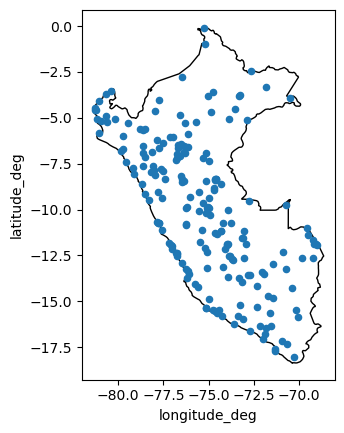

In [83]:
# let's plot

base = Peru_8901.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [84]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=brazil.crs.to_epsg())# the coordinates were in degrees - unprojected

<Axes: >

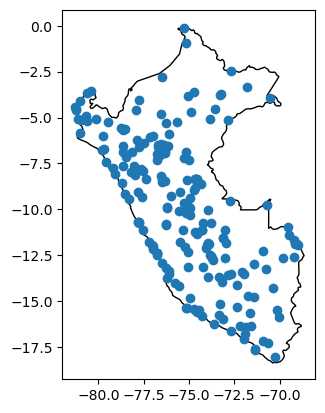

In [85]:
# does it look better?

# let's plot

base = Peru_8901.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [86]:
#remember:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

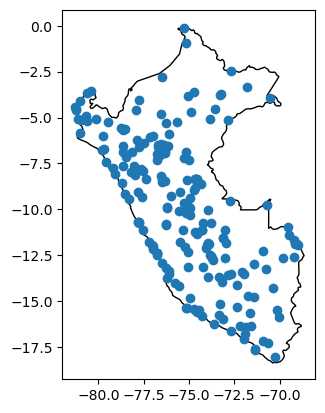

In [87]:
airports_8901=airports.to_crs(8901)

## then

base = Peru_8901.plot(color='white', edgecolor='black')
airports_8901.plot(ax=base)

In [88]:
airports_8901['type'].value_counts() # this will not work: airports.type.value_counts()


type
small_airport     142
medium_airport     29
closed             25
heliport            6
large_airport       1
Name: count, dtype: int64

In [89]:
airports_8901.rename(columns={'type':'kind'},inplace=True)


In [90]:
# adding the airports
airports_8901.to_file(os.path.join("maps","PeruMaps_8901.gpkg"), layer='airports', driver="GPKG")

## Geo Merging

Remember we have these data:

In [91]:
countries

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,South Sudan,"POLYGON ((34.21807 9.96458, 34.20722 9.90500, ..."
248,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,East Timor,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ..."
250,Curacao (Netherlands),"POLYGON ((-68.96556 12.19889, -68.91196 12.181..."


This map has no interesting information beyond the geometry. Let me bring this info:

In [92]:
fragilityLink="https://github.com/SocialAnalytics-StrategicIntelligence/TableOperations/raw/main/dataFiles/fragility/fragilityCoded_2012_2023.pkl"

fragility=pd.read_pickle(fragilityLink)

fragility.head()

,Country,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,E3_HumanFlightandBrainDrain,P1_StateLegitimacy,P2_PublicServices,P3_HumanRights,S1_DemographicPressures,S2_RefugeesandIDPs,X1_ExternalIntervention,iso2,iso3,Total_mnmx
0,SOMALIA,2013,113.900000,9.7,10.0,9.3,9.4,8.4,8.9,9.500000,9.8,10.0,9.5,10.0,9.400000,SO,SOM,10.000000
1,SOMALIA,2023,111.900000,9.5,10.0,8.7,9.5,9.1,8.6,9.600000,9.8,9.0,10.0,9.0,9.100000,SO,SOM,10.000000
2,SOMALIA,2018,113.200796,9.7,10.0,9.0,8.9,9.3,9.5,9.119045,9.3,9.6,10.0,9.7,9.081752,SO,SOM,9.983597
3,SOMALIA,2014,112.600000,9.4,10.0,9.3,9.1,8.7,8.9,9.100000,9.6,9.8,9.5,10.0,9.200000,SO,SOM,9.968153
4,SOMALIA,2015,114.000000,9.7,10.0,9.5,9.1,9.0,9.2,9.300000,9.3,10.0,9.6,9.8,9.500000,SO,SOM,9.948347


We want to add the fragility data into the map. That is the merging process.
For that, we need a common column. The country names is the option.

In [93]:
# to upper case.
countries['COUNTRY']=countries.COUNTRY.str.upper()

It is very unlikely the names are written the same. Verify:

In [94]:
onlyFragil=set(fragility.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragility.Country)

Check here:

In [95]:
onlyFragil

{'BRUNEI DARUSSALAM',
 'CONGO DEMOCRATIC REPUBLIC',
 'CONGO REPUBLIC',
 "COTE D'IVOIRE",
 'ESWATINI',
 'GUINEA BISSAU',
 'KYRGYZ REPUBLIC',
 'MICRONESIA',
 'SAMOA',
 'SLOVAK REPUBLIC',
 'TIMOR-LESTE'}

In [96]:
# and here
onlyMap

{'AMERICAN SAMOA (US)',
 'AMERICAN VIRGIN ISLANDS (US)',
 'ANDORRA',
 'ANGUILLA (UK)',
 'ANTARCTICA',
 'ARUBA (NETHERLANDS)',
 'BAKER ISLAND (US)',
 'BERMUDA (UK)',
 'BONAIRE (NETHERLANDS)',
 'BOUVET ISLAND (NORWAY)',
 'BRITISH INDIAN OCEAN TERRITORY (UK)',
 'BRITISH VIRGIN ISLANDS(UK)',
 'BRUNEI',
 'CAYMAN ISLANDS (UK)',
 'CHRISTMAS ISLAND (AUSTRALIA)',
 'COCOS (KEELING) ISLANDS (AUSTRALIA)',
 'CONGO',
 'COOK ISLANDS (NEW ZEALAND)',
 'CURACAO (NETHERLANDS)',
 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'DOMINICA',
 'EAST TIMOR',
 'FALKLAND ISLANDS (UK)',
 'FAROE ISLANDS (DENMARK)',
 'FEDERATED STATES OF MICRONESIA',
 'FRENCH GUIANA (FRANCE)',
 'FRENCH POLYNESIA (FRANCE)',
 'FRENCH SOUTHERN & ANTARCTIC LANDS (FRANCE)',
 'GIBRALTAR (UK)',
 'GLORIOSO ISLANDS (FRANCE)',
 'GREENLAND (DENMARK)',
 'GUADELOUPE (FRANCE)',
 'GUAM (US)',
 'GUERNSEY (UK)',
 'GUINEA-BISSAU',
 'HEARD ISLAND & MCDONALD ISLANDS (AUSTRALIA)',
 'HOWLAND ISLAND (US)',
 'ISLE OF MAN (UK)',
 'IVORY COAST',
 'JAN MAYEN (NORWAY)',

## Fuzzy merging

Let's find similar names:

In [98]:
pip install thefuzz



   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 186.2 kB/s eta 0:00:09
    --------------------------------------- 0.0/1.7 MB 186.2 kB/s eta 0:00:09
    --------------------------------------- 0.0/1.7 MB 186.2 kB/s eta 0:00:09
    --------------------------------------- 0.0/1.7 MB 186.2 kB/s eta 0:00:09
   - -------------------------------------- 0.1/1.7 MB 172.4 kB/s eta 0:00:10
   - -------------------------------------- 0.1/1.7 MB 218.5 kB/s eta 0:00:08
   - -------------------------------------- 0.1/1.7 MB 218.5 kB/s eta 0:00:08
   -- ------------------------------------- 0.1/1.7 MB 180.8 kB/s eta 0:00:09
   -- ------------------------------------- 0.1/1.7 MB 180.8 kB/s eta 0:00:09
   -- ---------------

In [99]:
from thefuzz import process

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil)]

[('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CONGO DEMOCRATIC REPUBLIC', ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO REPUBLIC', ('CONGO', 90)),
 ("COTE D'IVOIRE", ('IVORY COAST', 63)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('GUINEA BISSAU', ('GUINEA-BISSAU', 100)),
 ('KYRGYZ REPUBLIC', ('DEMOCRATIC REPUBLIC OF THE CONGO', 86)),
 ('MICRONESIA', ('FEDERATED STATES OF MICRONESIA', 90)),
 ('SAMOA', ('AMERICAN SAMOA (US)', 90)),
 ('SLOVAK REPUBLIC', ('DEMOCRATIC REPUBLIC OF THE CONGO', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [100]:
# subsetting
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil)
 if process.extractOne(country,onlyMap)[1]>=90]

[('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CONGO DEMOCRATIC REPUBLIC', ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO REPUBLIC', ('CONGO', 90)),
 ('GUINEA BISSAU', ('GUINEA-BISSAU', 100)),
 ('MICRONESIA', ('FEDERATED STATES OF MICRONESIA', 90)),
 ('SAMOA', ('AMERICAN SAMOA (US)', 90))]

Preparing a _dict_ of changes:

In [101]:
# then:
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragil)
 if process.extractOne(country,onlyMap)[1]>=90}
try1

{'BRUNEI DARUSSALAM': 'BRUNEI',
 'CONGO DEMOCRATIC REPUBLIC': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO REPUBLIC': 'CONGO',
 'GUINEA BISSAU': 'GUINEA-BISSAU',
 'MICRONESIA': 'FEDERATED STATES OF MICRONESIA',
 'SAMOA': 'AMERICAN SAMOA (US)'}

Making changes and updating:

In [102]:
fragility.Country.replace(try1,inplace=True)

# updating
onlyFragil=set(fragility.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragility.Country)

# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil)]

C:\Users\USER\AppData\Local\Temp\ipykernel_12728\1011014739.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fragility.Country.replace(try1,inplace=True)


[("COTE D'IVOIRE", ('IVORY COAST', 63)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('KYRGYZ REPUBLIC', ('KYRGYZSTAN', 68)),
 ('SLOVAK REPUBLIC', ('SLOVAKIA', 77)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [103]:
# then:
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragil)
 if process.extractOne(country,onlyMap)[1]!=60}
try2

{"COTE D'IVOIRE": 'IVORY COAST',
 'KYRGYZ REPUBLIC': 'KYRGYZSTAN',
 'SLOVAK REPUBLIC': 'SLOVAKIA',
 'TIMOR-LESTE': 'EAST TIMOR'}

In [104]:
# changing
fragility.Country.replace(try2,inplace=True)

# new update
onlyFragil=set(fragility.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragility.Country)

# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil)]

[('ESWATINI', ('LIECHTENSTEIN', 60))]

At this stage, we go manual:

In [105]:
fragility.Country.replace({'ESWATINI': 'SWAZILAND'},inplace=True)

#
onlyFragil=set(fragility.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragility.Country)

#
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragil)]


[]

We can not improve the situation.

Now, when you merge a GDF with a DF, **the GDF has to be on the left**:

In [106]:
theMapAndData=countries.merge(fragility,left_on='COUNTRY', right_on='Country')
# here it is (new map):
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   COUNTRY                      1969 non-null   object  
 1   geometry                     1969 non-null   geometry
 2   Country                      1969 non-null   object  
 3   Year                         1969 non-null   int64   
 4   Total                        1969 non-null   float64 
 5   C1_SecurityApparatus         1969 non-null   float64 
 6   C2_FactionalizedElites       1969 non-null   float64 
 7   C3_GroupGrievance            1969 non-null   float64 
 8   E1_Economy                   1969 non-null   float64 
 9   E2_EconomicInequality        1969 non-null   float64 
 10  E3_HumanFlightandBrainDrain  1969 non-null   float64 
 11  P1_StateLegitimacy           1969 non-null   float64 
 12  P2_PublicServices            1969 non-null   float64 


# Choropleths

We should plan how to color the polygons based on some variable:

In [107]:
theMapAndData['Total_mnmx'].describe()

count    1969.000000
mean        5.336034
std         2.484143
min         0.000000
25%         3.545360
50%         5.707298
75%         7.111345
max        10.000000
Name: Total_mnmx, dtype: float64

<Axes: >

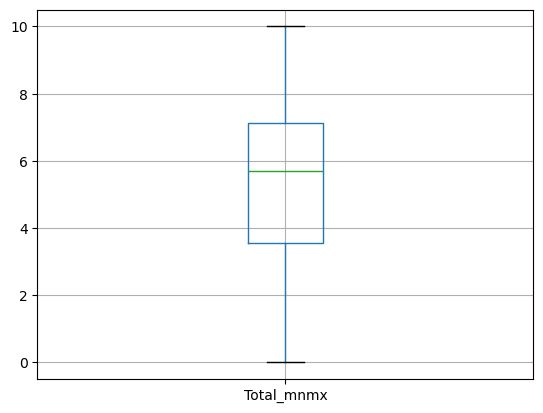

In [108]:
theMapAndData.boxplot(column=['Total_mnmx'])

<Axes: >

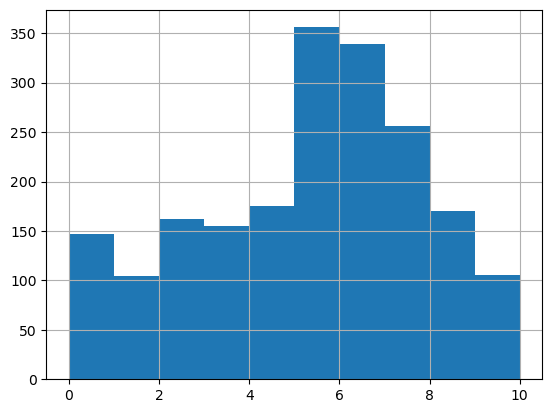

In [109]:
theMapAndData['Total_mnmx'].hist()

Let's see other possibilities to cut the data (instead of the amount of intervals presented in the histogram), but please install [**numba**](https://numba.readthedocs.io/en/stable/user/installing.html) before runing the next code; also make sure you have **pysal**, **mapclassify** and **numpy** installed:

In [113]:
pip show numba pysal mapclassify numpy

Name: numba
Version: 0.59.0
Summary: compiling Python code using LLVM
Home-page: https://numba.pydata.org
Author: 
Author-email: 
License: BSD
Location: C:\Users\USER\anaconda3\Lib\site-packages
Requires: llvmlite, numpy
Required-by: datashader, quantecon, segregation
---
Name: pysal
Version: 24.1
Summary: A library of spatial analysis functions.
Home-page: http://pysal.org
Author: 
Author-email: 
License: BSD
Location: C:\Users\USER\anaconda3\Lib\site-packages
Requires: access, esda, giddy, inequality, libpysal, mapclassify, mgwr, momepy, pointpats, segregation, spaghetti, spglm, spint, splot, spopt, spreg, spvcm, tobler
Required-by: 
---
Name: mapclassify
Version: 2.6.1
Summary: Classification Schemes for Choropleth Maps.
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause
Location: C:\Users\USER\anaconda3\Lib\site-packages
Requires: networkx, numpy, pandas, scikit-learn, scipy
Required-by: pysal, segregation, splot, spopt
---
Name: numpy
Version: 1.26.4
Summary: Fundamental pa

In [111]:
pip install -U mapclassify


Note: you may need to restart the kernel to use updated packages.


In [112]:
pip install -U pysal


Note: you may need to restart the kernel to use updated packages.Collecting pysal
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
      --------------------------------------- 0.1/5.7 MB 4.8 MB/s eta 0:00:02
      --------------------------------------- 0.1/5.7 MB 1.7 MB/s eta 0:00:04
     - -------------------------------------- 0.2/5.7 MB 1.5 MB/s eta 0:00:04
     - -------------------------------------- 0.2/5.7 MB 1.5 MB/s eta 0:00:04
     - -------------------------------------- 0.2/5.7 MB 1.5 MB/s eta 0:00:04
     - -------------------------------------- 0.2/5.7 MB 1.1 MB/s eta 0:00:06
     - -------------------------------------- 0.2/5.7 MB 942.1 kB/s eta 0:00:06
     - -------------------------------------- 0.3/5.7 MB 874.6 kB/s eta 0:00:07
     - -------------------------------------- 0.3/5.7 MB 811.7 kB/s eta 0:00:07
     -- -----------------------------

In [114]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.Total_mnmx
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

How can we select the right classification?
Let me use the the Absolute deviation around class median (ADCM) to make the comparisson:

In [115]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

Now, plot the **adcms**:

<Axes: ylabel='Classifier'>

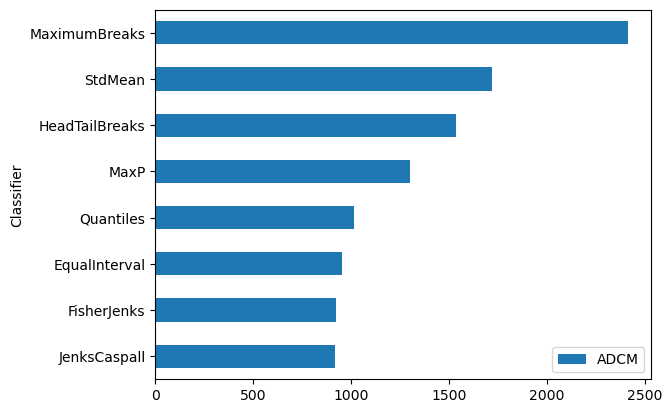

In [116]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

Let's save the best three strategies:

In [117]:
theMapAndData.loc[:,'Total_ei5'] = ei5.yb
theMapAndData.loc[:,'Total_fj5'] = fj5.yb
theMapAndData.loc[:,'Total_jc5'] = jc5.yb

In [118]:
# there you are
theMapAndData.head()

,COUNTRY,geometry,Country,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,...,P3_HumanRights,S1_DemographicPressures,S2_RefugeesandIDPs,X1_ExternalIntervention,iso2,iso3,Total_mnmx,Total_ei5,Total_fj5,Total_jc5
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2013,58.000000,4.9,3.7,4.1,4.5,5.6,...,4.400000,4.6,3.0,5.8,AG,ATG,4.171011,2,1,1
1,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2023,53.800000,4.9,3.7,3.6,6.6,5.1,...,3.800000,3.7,2.7,6.1,AG,ATG,4.034908,2,1,1
2,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2018,55.611041,5.7,3.7,3.6,4.8,4.2,...,4.411041,4.6,3.2,5.8,AG,ATG,3.948394,1,1,1
3,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2014,59.000000,4.9,3.7,4.1,4.5,5.3,...,4.700000,4.9,3.3,6.1,AG,ATG,4.278132,2,1,1
4,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2015,57.800000,5.2,3.7,3.9,5.0,5.0,...,4.500000,4.6,3.0,5.8,AG,ATG,4.142562,2,1,1


Let's check the mean of 'Total_mnmx' by the labels of the columns created (from '0' to '4')

In [119]:
indexList=['Total_ei5','Total_fj5','Total_jc5']
aggregator={'Total_mnmx': ['mean']}

pd.concat([theMapAndData[['Total_mnmx',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

,Total_ei5,Total_mnmx,Total_fj5,Total_mnmx,Total_jc5,Total_mnmx
,,mean,,mean,,mean
0,0,0.901965,0,0.937088,0,0.901965
1,1,3.027346,1,3.199770,1,3.193175
2,2,5.227688,2,5.433028,2,5.466820
3,3,6.906840,3,6.964059,3,6.940591
4,4,8.862077,4,8.766700,4,8.687480


Verify data types:

In [120]:
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   COUNTRY                      1969 non-null   object  
 1   geometry                     1969 non-null   geometry
 2   Country                      1969 non-null   object  
 3   Year                         1969 non-null   int64   
 4   Total                        1969 non-null   float64 
 5   C1_SecurityApparatus         1969 non-null   float64 
 6   C2_FactionalizedElites       1969 non-null   float64 
 7   C3_GroupGrievance            1969 non-null   float64 
 8   E1_Economy                   1969 non-null   float64 
 9   E2_EconomicInequality        1969 non-null   float64 
 10  E3_HumanFlightandBrainDrain  1969 non-null   float64 
 11  P1_StateLegitimacy           1969 non-null   float64 
 12  P2_PublicServices            1969 non-null   float64 


Let me create a copy of those columns with new names:

In [121]:
newColNames=[ name+"_cat" for name in indexList]

theMapAndData[newColNames]=theMapAndData.loc[:,indexList]
theMapAndData.head()

,COUNTRY,geometry,Country,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,...,X1_ExternalIntervention,iso2,iso3,Total_mnmx,Total_ei5,Total_fj5,Total_jc5,Total_ei5_cat,Total_fj5_cat,Total_jc5_cat
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2013,58.000000,4.9,3.7,4.1,4.5,5.6,...,5.8,AG,ATG,4.171011,2,1,1,2,1,1
1,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2023,53.800000,4.9,3.7,3.6,6.6,5.1,...,6.1,AG,ATG,4.034908,2,1,1,2,1,1
2,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2018,55.611041,5.7,3.7,3.6,4.8,4.2,...,5.8,AG,ATG,3.948394,1,1,1,1,1,1
3,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2014,59.000000,4.9,3.7,4.1,4.5,5.3,...,6.1,AG,ATG,4.278132,2,1,1,2,1,1
4,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",ANTIGUA AND BARBUDA,2015,57.800000,5.2,3.7,3.9,5.0,5.0,...,5.8,AG,ATG,4.142562,2,1,1,2,1,1


In [122]:
# renaming
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData[newColNames]=theMapAndData.loc[:,newColNames].replace(newLabelsForLevels)
theMapAndData.drop(columns=['Country'],inplace=True)
theMapAndData

,COUNTRY,geometry,Year,Total,C1_SecurityApparatus,C2_FactionalizedElites,C3_GroupGrievance,E1_Economy,E2_EconomicInequality,E3_HumanFlightandBrainDrain,...,X1_ExternalIntervention,iso2,iso3,Total_mnmx,Total_ei5,Total_fj5,Total_jc5,Total_ei5_cat,Total_fj5_cat,Total_jc5_cat
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2013,58.000000,4.900000,3.7,4.1,4.5,5.6,7.6,...,5.8,AG,ATG,4.171011,2,1,1,2_Middle,1_Good,1_Good
1,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2023,53.800000,4.900000,3.7,3.6,6.6,5.1,6.2,...,6.1,AG,ATG,4.034908,2,1,1,2_Middle,1_Good,1_Good
2,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2018,55.611041,5.700000,3.7,3.6,4.8,4.2,6.7,...,5.8,AG,ATG,3.948394,1,1,1,1_Good,1_Good,1_Good
3,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2014,59.000000,4.900000,3.7,4.1,4.5,5.3,7.6,...,6.1,AG,ATG,4.278132,2,1,1,2_Middle,1_Good,1_Good
4,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",2015,57.800000,5.200000,3.7,3.9,5.0,5.0,7.3,...,5.8,AG,ATG,4.142562,2,1,1,2_Middle,1_Good,1_Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2020,82.663114,6.463114,8.3,5.6,7.2,6.5,7.3,...,8.9,TL,TLS,6.955837,3,3,3,3_Bad,3_Bad,3_Bad
1965,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2016,90.800000,7.400000,8.3,6.7,8.1,7.0,7.3,...,9.0,TL,TLS,7.563025,3,3,3,3_Bad,3_Bad,3_Bad
1966,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2017,90.500000,7.200000,8.3,6.5,7.9,6.8,7.6,...,9.5,TL,TLS,7.542017,3,3,3,3_Bad,3_Bad,3_Bad
1967,EAST TIMOR,"MULTIPOLYGON (((124.41824 -9.30010, 124.40446 ...",2021,80.900000,6.200000,8.3,5.3,7.7,6.2,7.0,...,8.6,TL,TLS,6.774869,3,3,3,3_Bad,3_Bad,3_Bad


We are ready for a choropleth:

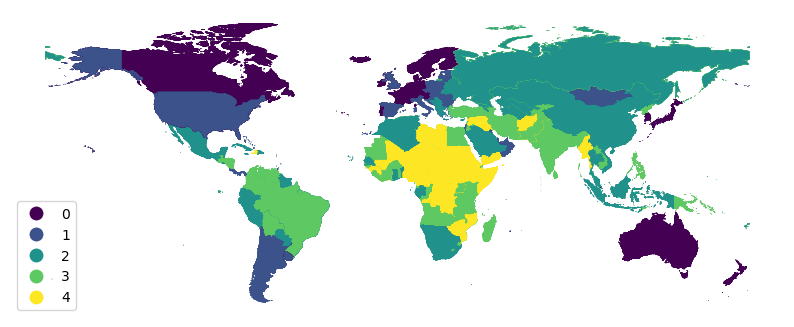

In [123]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='Total_ei5', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

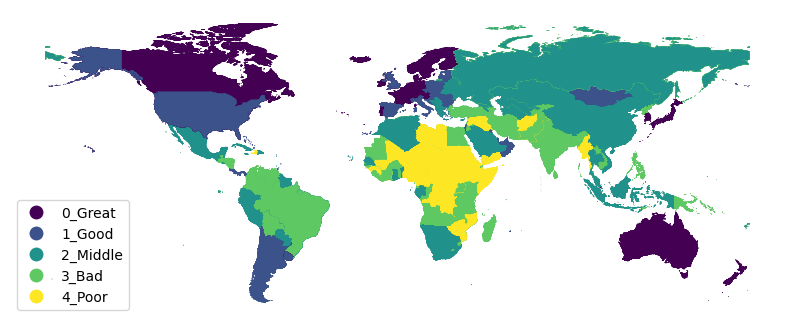

In [124]:
# alternatively:

import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='Total_ei5_cat', # annotated
        cmap='viridis',
        categorical=True,
        edgecolor='white',
        linewidth=0.,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

Once you know the ADCM, you can request the choropleth without creating a variable:

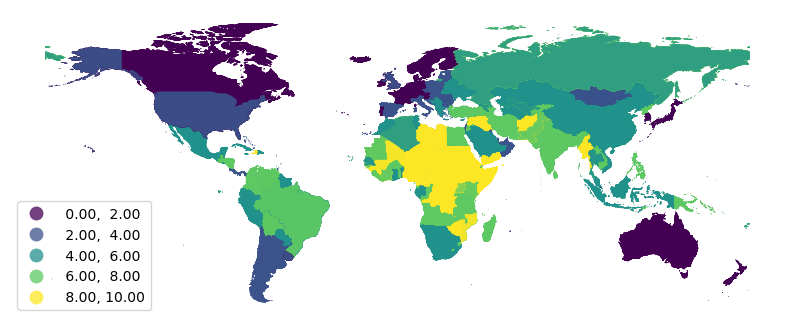

In [125]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='Total_mnmx',
        cmap='viridis',
                   scheme="equal_interval",
        edgecolor='white',
        linewidth=0.,
        alpha=0.75,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

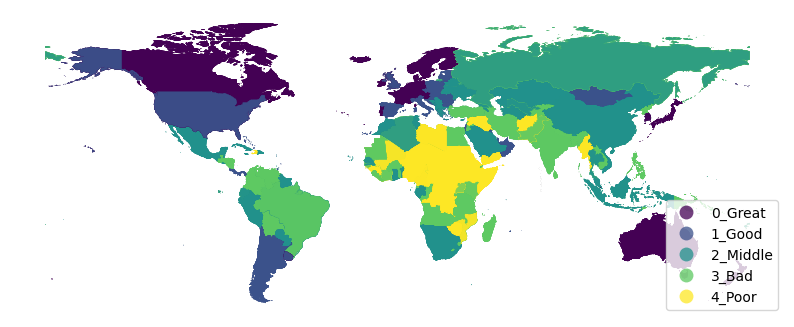

In [126]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='Total_ei5_cat',
        cmap='viridis',
        categorical=True,
        edgecolor='white',
        linewidth=0.,
        alpha=0.75,
        legend=True,
        legend_kwds={'loc':"lower right"},
        ax=ax
       )

ax.set_axis_off()

### Exercise 4 No la hice :c

<div class="alert-success">

1. Add the column "continent" to the '_theMapAndData_' using the file from this [link from kagle](https://www.kaggle.com/datasets/andradaolteanu/country-mapping-iso-continent-region?resource=download).
2. Keep the American continent.
3. Compute the centroids of the countries in America      
4. Use the centroids to represent the fragility (Total_ei5) of 2020 in a map using R.
    
</div>

Let's save our data

In [ ]:
theMapAndData.to_file(os.path.join("maps","theMapAndData.gpkg"), layer='fragility', driver="GPKG")

<div class="alert alert-danger">
  <strong>CHALLENGE!</strong>
   <br> * Use R to plot the countries whose fragility increased, decreased, or kept the the same the last 10 years.
</div>